# Homework

This homework will drop you in the deep end a bit, but let you flex some analytical muscles!

Your task? Take the Artificial HES data and using pandas, do some analysis! Follow the steps laid out, but if there's another area you'd like to dig into, feel free!

Interested in finding more about the data? There's a .xlsx file that describes what each column and value means.
 
https://digital.nhs.uk/data-and-information/data-tools-and-services/data-services/hospital-episode-statistics/hospital-episode-statistics-data-dictionary 

In [1]:
# These libraries will help us download the file
import zipfile
import io
from pathlib import Path
import requests

zip_file_url = "https://files.digital.nhs.uk/assets/Services/Artificial%20data/Artificial%20HES%20final/artificial_hes_ae_202302_v1_sample.zip"
path_to_downloaded_data = "data_in/artificial_hes_ae_202302_v1_sample.zip/artificial_hes_ae_202302_v1_sample/artificial_hes_ae_2122.csv"

filename = Path(zip_file_url).name
output_path = f"data_in/{filename}"

response = requests.get(zip_file_url, stream=True,timeout=3600)
downloaded_zip = zipfile.ZipFile(io.BytesIO(response.content))
downloaded_zip.extractall(output_path)

Step 1: Import the pandas library:

In [2]:
import pandas as pd

Step 2: Read the csv file (found at the path_to_downloaded_data) in as a pandas dataframe, and have a look at it

In [3]:
data_df = pd.read_csv(path_to_downloaded_data)
data_df

,FYEAR,PARTYEAR,PSEUDO_HESID,AEKEY,AEKEY_FLAG,AEARRIVALMODE,AEATTEND_EXC_PLANNED,AEATTENDCAT,AEATTENDDISP,AEDEPTTYPE,...,LSOA11,MSOA11,PROVDIST,PROVDIST_FLAG,NER_GP_PRACTICE,NER_RESIDENCE,NER_TREATMENT,SITETRET,SITEDIST,SITEDIST_FLAG
0,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,910587081231,1,2,1,1,3,1,...,E01000385,E02001768,19.37,3.0,QKS,QKS,QHM,RW601,4.89,5.0
1,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,747777461989,1,2,1,1,3,1,...,E01030571,E02004833,3.96,3.0,QMJ,QYG,QKS,RY901,1.21,5.0
2,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,244053969711,1,2,1,1,3,3,...,E01008938,E02005828,NaN,3.0,QWE,QKK,QWO,RJC02,15.16,5.0
3,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,425257514835,1,2,1,1,1,1,...,E01030533,E02000912,23.68,3.0,QMJ,QRV,QOP,RJE07,3.16,5.0
4,2122,202103,TESTqPNh7HEHdm1sB5QlvVaSQZS7BekK,892001219292,1,2,1,1,3,1,...,E01025434,E02004315,5.85,3.0,QMF,QM7,QMJ,RDE03,2.41,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2122,202103,TESTn5S3x17z6OUobKDuunS3i3Kt3DEx,674418663776,1,2,1,1,6,1,...,E01024902,E02005474,16.59,3.0,QOP,QUA,QMJ,RC979,18.83,5.0
9996,2122,202103,TESTn5S3x17z6OUobKDuunS3i3Kt3DEx,383591281686,1,2,1,1,1,1,...,E01025347,E02001381,3.14,3.0,Y,QWO,QWO,RA701,1.63,5.0
9997,2122,202103,TESTFACawnRyvo0yFNHrWEvWK60hkmBz,17907345944,1,2,1,1,2,3,...,E01028506,E02003764,7.91,3.0,QUE,QM7,QJM,RAPNM,14.44,5.0
9998,2122,202103,TESTETfkr64gqmNVi9qYLEcrcOC9Lnxw,343239391585,1,1,1,1,7,3,...,E01004390,E02000305,4.69,3.0,QOX,QOQ,QHL,RWJ01,1.89,5.0


There's 165 columns in the df, so let's just pick a few.
Keep columns: "EPIKEY", "CCG_GP_PRACTICE", "ARRIVALDATE"

In [4]:
data_df.dtypes

FYEAR              int64
PARTYEAR           int64
PSEUDO_HESID      object
AEKEY              int64
AEKEY_FLAG         int64
                  ...   
NER_RESIDENCE     object
NER_TREATMENT     object
SITETRET          object
SITEDIST         float64
SITEDIST_FLAG    float64
Length: 165, dtype: object

In [5]:
data_df = data_df[["EPIKEY", "CCG_GP_PRACTICE", "ARRIVALDATE"]]
data_df

,EPIKEY,CCG_GP_PRACTICE,ARRIVALDATE
0,870626682566,02A,2021-04-01
1,421928688730,26A,2021-06-25
2,913266136591,01H,2021-06-02
3,440934773111,36L,2021-05-18
4,232094127215,15N,2021-04-11
...,...,...,...
9995,844711937804,26A,2021-04-29
9996,887931767755,11J,2021-06-06
9997,353849632481,W2U3Z,2021-06-09
9998,221408424072,06K,2021-05-20


Now, for filtering and sorting.

- Sort the df by ARRIVALDATE, so that the date is descending. 
- Filter for ARRIVALDATE after 2021-04-01 and before 2021-05-01.
- Only include those with CCG_GP_PRACTICE 06K, 02A or 15M.

In [6]:
# Convert Arrival date to datetime 
data_df['ARRIVALDATE'] = pd.to_datetime(data_df['ARRIVALDATE'])
data_df.dtypes

/tmp/ipykernel_6773/3569380683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['ARRIVALDATE'] = pd.to_datetime(data_df['ARRIVALDATE'])


EPIKEY                      int64
CCG_GP_PRACTICE            object
ARRIVALDATE        datetime64[ns]
dtype: object

In [7]:
sorted_df = data_df.sort_values(['ARRIVALDATE'], ascending=False) # sort desc by Arrival date
sorted_df

,EPIKEY,CCG_GP_PRACTICE,ARRIVALDATE
9064,407701115197,B2M3M,2021-06-30
5197,32103886002,72Q,2021-06-30
3356,558855756048,02Y,2021-06-30
5280,361672308477,02G,2021-06-30
5273,933537914469,93C,2021-06-30
...,...,...,...
553,1126395411,72Q,2021-04-01
1861,813279555184,07H,2021-04-01
1907,634085699563,11J,2021-04-01
3253,98741585619,36L,2021-04-01


In [8]:
# Filter between dates
filtered_df_1 = sorted_df[
                (sorted_df['ARRIVALDATE'] > '2021-04-01') &
                (sorted_df['ARRIVALDATE'] < '2021-05-01')
                ] 
filtered_df_1

,EPIKEY,CCG_GP_PRACTICE,ARRIVALDATE
3709,529701158102,02H,2021-04-30
7720,642997363435,11X,2021-04-30
2081,455468823543,06N,2021-04-30
6579,20698645447,06H,2021-04-30
4687,950315059123,11M,2021-04-30
...,...,...,...
2234,864456884524,15M,2021-04-02
6634,67043066403,05V,2021-04-02
8128,290437938328,02Y,2021-04-02
8130,369249981569,14L,2021-04-02


In [9]:
# Only include those with CCG_GP_PRACTICE 06K, 02A or 15M
filtered_df_2 = filtered_df_1[filtered_df_1["CCG_GP_PRACTICE"].isin(['06K', '02A', '15M'])]
filtered_df_2

,EPIKEY,CCG_GP_PRACTICE,ARRIVALDATE
7932,383781473626,06K,2021-04-30
6796,890934583379,15M,2021-04-30
9228,529798840942,15M,2021-04-30
1491,548480710928,15M,2021-04-30
1959,812217934971,06K,2021-04-29
...,...,...,...
8337,458488562761,15M,2021-04-04
9776,321720766061,15M,2021-04-03
1515,867796386412,02A,2021-04-03
7899,543979345900,15M,2021-04-02


In [10]:
# Combined steps
df = data_df
df = df[(df['ARRIVALDATE'] > '2021-04-01') & (df['ARRIVALDATE'] < '2021-05-01') & (df["CCG_GP_PRACTICE"].isin(['06K', '02A', '15M']))].sort_values(['ARRIVALDATE'], ascending=False)
df

,EPIKEY,CCG_GP_PRACTICE,ARRIVALDATE
9228,529798840942,15M,2021-04-30
6796,890934583379,15M,2021-04-30
7932,383781473626,06K,2021-04-30
1491,548480710928,15M,2021-04-30
1959,812217934971,06K,2021-04-29
...,...,...,...
4337,219085521925,15M,2021-04-04
1515,867796386412,02A,2021-04-03
9776,321720766061,15M,2021-04-03
7899,543979345900,15M,2021-04-02


Create a new dataframe, with two columns: CCG_Code, and CCG_Name:

- 15M: DERBY AND DERBYSHIRE
- 06K: HERTFORDSHIRE AND WEST ESSEX
- 02A: GREATER MANCHESTER

In [11]:
df_CCGs = pd.DataFrame({

    "CCG_Code": ["15M", "06K", "02A"],
    "CCG_Name": ["DERBY AND DERBYSHIRE", "HERTFORDSHIRE AND WEST ESSEX", "GREATER MANCHESTER"]
})

df_CCGs

,CCG_Code,CCG_Name
0,15M,DERBY AND DERBYSHIRE
1,06K,HERTFORDSHIRE AND WEST ESSEX
2,02A,GREATER MANCHESTER


Join your two dataframes together, on the CCG_Code and the CCG_GP_Practice columns, and drop any unneeded columns.

In [12]:
df_merged = df.merge(df_CCGs, left_on = 'CCG_GP_PRACTICE', right_on = 'CCG_Code', how = 'inner')
df_merged = df_merged.drop('EPIKEY', axis = 1)
df_merged

,CCG_GP_PRACTICE,ARRIVALDATE,CCG_Code,CCG_Name
0,15M,2021-04-30,15M,DERBY AND DERBYSHIRE
1,15M,2021-04-30,15M,DERBY AND DERBYSHIRE
2,06K,2021-04-30,06K,HERTFORDSHIRE AND WEST ESSEX
3,15M,2021-04-30,15M,DERBY AND DERBYSHIRE
4,06K,2021-04-29,06K,HERTFORDSHIRE AND WEST ESSEX
...,...,...,...,...
94,15M,2021-04-04,15M,DERBY AND DERBYSHIRE
95,02A,2021-04-03,02A,GREATER MANCHESTER
96,15M,2021-04-03,15M,DERBY AND DERBYSHIRE
97,15M,2021-04-02,15M,DERBY AND DERBYSHIRE


Now, I want you to find out the count of rows, grouped for each CCG.
Hint: use `groupby([])` and `.size()`

In [13]:
CCG_counts = df_merged.groupby(["CCG_Code", "CCG_Name"]).size().reset_index(name = "Count")
CCG_counts

,CCG_Code,CCG_Name,Count
0,02A,GREATER MANCHESTER,14
1,06K,HERTFORDSHIRE AND WEST ESSEX,32
2,15M,DERBY AND DERBYSHIRE,53


Use this dataframe to create a bar chart:

In [14]:
CCG_counts['CCG'] = CCG_counts['CCG_Name'] + " (" + CCG_counts['CCG_Code'] + ")"

In [15]:
CCG_counts

,CCG_Code,CCG_Name,Count,CCG
0,02A,GREATER MANCHESTER,14,GREATER MANCHESTER (02A)
1,06K,HERTFORDSHIRE AND WEST ESSEX,32,HERTFORDSHIRE AND WEST ESSEX (06K)
2,15M,DERBY AND DERBYSHIRE,53,DERBY AND DERBYSHIRE (15M)


<Axes: title={'center': 'Count of rows by CCG'}, xlabel='CCG'>

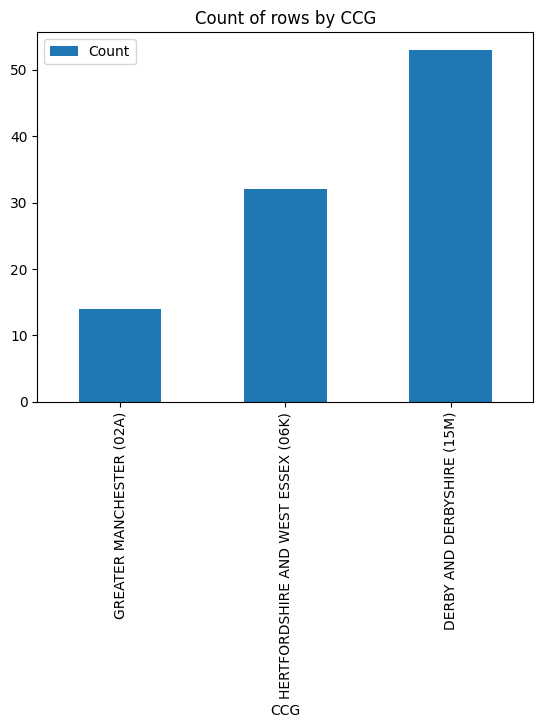

In [16]:
import matplotlib

CCG_counts.plot(y='Count', x='CCG', kind='bar', title='Count of rows by CCG')

Remember to push your branch!

- git add .
- git commit -m "commit message"
- git push